<a href="https://colab.research.google.com/github/RedPandaStyle/ACE-Predictive-Analytics/blob/main/Hand_Written_Digits_JPV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2
import numpy as np

import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
from keras.utils.vis_utils import plot_model

from google.colab.patches import cv2_imshow

In [10]:
# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [11]:
# Training Parameters
batch_size = 128
epochs = 5

In [12]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

In [13]:
# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [14]:
# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

In [15]:
# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [16]:
# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

In [17]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [18]:
# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [19]:
# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

Number of Classes: 10


In [20]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [21]:
# create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [22]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

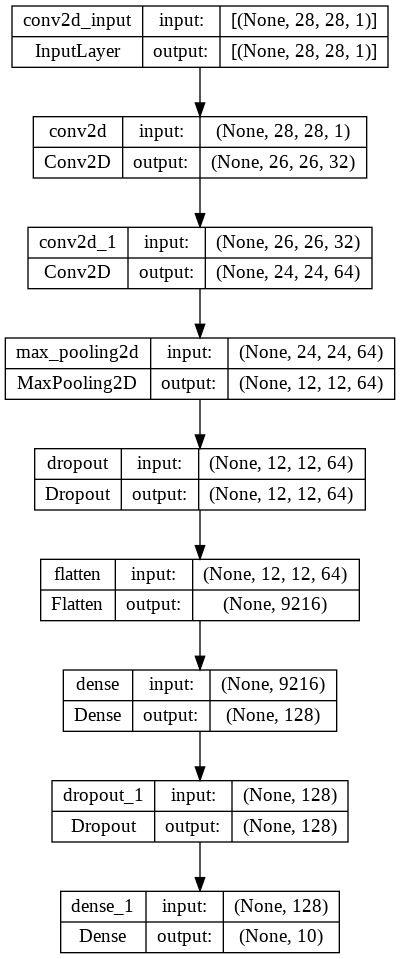

In [24]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 161s 340ms/step - loss: 2.2859 - accuracy: 0.1334 - val_loss: 2.2572 - val_accuracy: 0.2690
Epoch 2/5
469/469 [==============================] - 161s 343ms/step - loss: 2.2407 - accuracy: 0.2201 - val_loss: 2.2033 - val_accuracy: 0.3598
Epoch 3/5
469/469 [==============================] - 161s 344ms/step - loss: 2.1845 - accuracy: 0.3064 - val_loss: 2.1336 - val_accuracy: 0.4924
Epoch 4/5
469/469 [==============================] - 158s 338ms/step - loss: 2.1103 - accuracy: 0.3878 - val_loss: 2.0387 - val_accuracy: 0.6026
Epoch 5/5
469/469 [==============================] - 163s 347ms/step - loss: 2.0074 - accuracy: 0.4666 - val_loss: 1.9093 - val_accuracy: 0.6702


In [26]:
score = model.evaluate(x_test, y_test, verbose=0)

In [27]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.9093133211135864
Test accuracy: 0.670199990272522


In [28]:
model.save('cnn1.h5')

In [29]:
def x_cord_contour(contour):
    # This function take a contour from findContours
    # it then outputs the x centroid coordinates
    M = cv2.moments(contour)
    return (int(M['m10']/M['m00']))

In [30]:
def makeSquare(not_square):
    # This function takes an image and makes the dimenions square
    # It adds black pixels as the padding where needed

    BLACK = [0,0,0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Height = ", height, "Width = ", width)
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        #print("New Height = ", height, "New Width = ", width)
        if (height > width):
            pad = int((height - width)/2)
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,0,0,pad,pad,cv2.BORDER_CONSTANT,value=BLACK)
        else:
            pad = (width - height)/2
            #print("Padding = ", pad)
            doublesize_square = cv2.copyMakeBorder(doublesize,pad,pad,0,0,\
                                                   cv2.BORDER_CONSTANT,value=BLACK)
    doublesize_square_dim = doublesize_square.shape
    #print("Sq Height = ", doublesize_square_dim[0], "Sq Width = ", doublesize_square_dim[1])
    return doublesize_square

In [31]:
def resize_to_pixel(dimensions, image):
    # This function then re-sizes an image to the specificied dimenions

    buffer_pix = 4
    dimensions  = dimensions - buffer_pix
    squared = image
    r = float(dimensions) / squared.shape[1]
    dim = (dimensions, int(squared.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    img_dim2 = resized.shape
    height_r = img_dim2[0]
    width_r = img_dim2[1]
    BLACK = [0,0,0]
    if (height_r > width_r):
        resized = cv2.copyMakeBorder(resized,0,0,0,1,cv2.BORDER_CONSTANT,value=BLACK)
    if (height_r < width_r):
        resized = cv2.copyMakeBorder(resized,1,0,0,0,cv2.BORDER_CONSTANT,value=BLACK)
    p = 2
    ReSizedImg = cv2.copyMakeBorder(resized,p,p,p,p,cv2.BORDER_CONSTANT,value=BLACK)
    img_dim = ReSizedImg.shape
    height = img_dim[0]
    width = img_dim[1]
    #print("Padded Height = ", height, "Width = ", width)
    return ReSizedImg

In [32]:
classifier = load_model('cnn1.h5')

In [33]:
image = cv2.imread('numbers.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
cv2.waitKey(0)

error: ignored